In [1]:
from matplotlib import pyplot as plt
from models import RealNVP
from utils.training_utils import TrainingCenter
from utils.data_utils import ImageDataset
import torch
%load_ext autoreload
%autoreload 2

In [2]:
network = RealNVP(in_channels=2, mid_channels=32)
tc = TrainingCenter(network, None, snapshots_folder=r"C:\Users\mrsto\Desktop\.snapshots", model_name="real_nvp", resume_mode="best")
data = ImageDataset(r"data/bf.png", None, None, ignore_rgb=True, train=False)
with torch.no_grad():
    data.data = tc.model(torch.tensor(data.data))[0]

Model restored from epoch 50. Loss: 7.449


In [3]:
from models import Network
net = Network(2, 1, convex=True)
tc = TrainingCenter(net, None, model_name="convex", resume_mode="best")

Model restored from epoch 48. Loss: 0.012


Model restored from epoch 50. Loss: 7.449


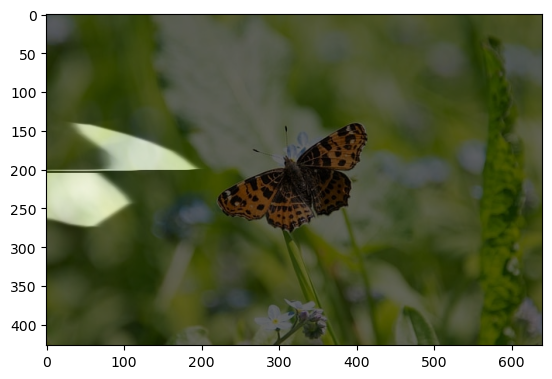

In [4]:
image, predictions = tc.inference(r"data/bf.png")

plt.imshow(image)
plt.imshow(predictions, cmap='Greys', alpha=0.6)
plt.show()